In [9]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
df= pd.read_csv("real_estate_texas_500_2024.csv")
df.head()

,url,status,id,listPrice,baths,baths_full,baths_full_calc,beds,sqft,stories,sub_type,text,type,year_built
0,https://www.realtor.com/realestateandhomes-det...,for_sale,9773941616,240000.0,2,2.0,2.0,3.0,1190.0,1.0,NaN,Welcome home to your peaceful retreat nestled ...,single_family,2018.0
1,https://www.realtor.com/realestateandhomes-det...,for_sale,9224923922,379900.0,4,3.0,3.0,4.0,2033.0,1.0,NaN,"Beautiful country home on 0.85 fenced acres, m...",single_family,2002.0
2,https://www.realtor.com/realestateandhomes-det...,for_sale,9840661824,370000.0,2,2.0,2.0,4.0,2062.0,1.0,NaN,PRICED TO SELL CORNER LOT HAS A STORM SHELTER ...,single_family,2012.0
3,https://www.realtor.com/realestateandhomes-det...,for_sale,7338317229,444000.0,4,3.0,3.0,5.0,3705.0,2.0,NaN,Come check out country living in the city! Are...,single_family,1985.0
4,https://www.realtor.com/realestateandhomes-det...,for_sale,7285845528,569000.0,2,2.0,2.0,3.0,3282.0,2.0,NaN,Welcome to your dream retreat! Nestled on over...,single_family,1981.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   url              501 non-null    object 
 1   status           501 non-null    object 
 2   id               501 non-null    int64  
 3   listPrice        499 non-null    float64
 4   baths            501 non-null    int64  
 5   baths_full       436 non-null    float64
 6   baths_full_calc  436 non-null    float64
 7   beds             440 non-null    float64
 8   sqft             438 non-null    float64
 9   stories          391 non-null    float64
 10  sub_type         10 non-null     object 
 11  text             495 non-null    object 
 12  type             501 non-null    object 
 13  year_built       289 non-null    float64
dtypes: float64(7), int64(2), object(5)
memory usage: 54.9+ KB


In [4]:
df["sub_type"].nunique()

2

In [5]:
df["sub_type"].value_counts()

townhouse    6
condo        4
Name: sub_type, dtype: int64

In [6]:
df.drop("sub_type", axis = 1, inplace = True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   url              501 non-null    object 
 1   status           501 non-null    object 
 2   id               501 non-null    int64  
 3   listPrice        499 non-null    float64
 4   baths            501 non-null    int64  
 5   baths_full       436 non-null    float64
 6   baths_full_calc  436 non-null    float64
 7   beds             440 non-null    float64
 8   sqft             438 non-null    float64
 9   stories          391 non-null    float64
 10  text             495 non-null    object 
 11  type             501 non-null    object 
 12  year_built       289 non-null    float64
dtypes: float64(7), int64(2), object(4)
memory usage: 51.0+ KB


In [9]:
df.drop(["url", "id"], axis=1 , inplace = True)

In [11]:
df.head(2)

,status,listPrice,baths,baths_full,baths_full_calc,beds,sqft,stories,text,type,year_built
0,for_sale,240000.0,2,2.0,2.0,3.0,1190.0,1.0,Welcome home to your peaceful retreat nestled ...,single_family,2018.0
1,for_sale,379900.0,4,3.0,3.0,4.0,2033.0,1.0,"Beautiful country home on 0.85 fenced acres, m...",single_family,2002.0


In [13]:
for col in df.columns:
    print(f"*****-->{col}<--****")
    print(df[col].value_counts())
    print("***********")

*****-->status<--****
for_sale    501
Name: status, dtype: int64
***********
*****-->listPrice<--****
250000.0    7
340000.0    5
550000.0    5
229900.0    4
169900.0    4
           ..
709999.0    1
284950.0    1
251750.0    1
395900.0    1
109000.0    1
Name: listPrice, Length: 391, dtype: int64
***********
*****-->baths<--****
2    204
3    144
0     65
4     44
1     20
5     19
6      3
8      1
7      1
Name: baths, dtype: int64
***********
*****-->baths_full<--****
2.0    282
3.0     99
4.0     26
1.0     24
5.0      4
8.0      1
Name: baths_full, dtype: int64
***********
*****-->baths_full_calc<--****
2.0    282
3.0     99
4.0     26
1.0     24
5.0      4
8.0      1
Name: baths_full_calc, dtype: int64
***********
*****-->beds<--****
3.0    196
4.0    168
5.0     32
2.0     31
1.0      4
0.0      4
6.0      3
9.0      1
7.0      1
Name: beds, dtype: int64
***********
*****-->sqft<--****
1560.0    3
2060.0    3
1407.0    2
1753.0    2
3192.0    2
         ..
2307.0    1
2379.0   

In [50]:
df.drop("baths_full_calc",axis=1, inplace = True)

In [17]:
med = df["year_built"].median()
med

2006.0

In [18]:
df["year_built"].fillna(med, inplace=True)

In [21]:
df["year_built"].isnull().sum()

0

In [25]:
df["year_built"].head()

0    2018.0
1    2002.0
2    2012.0
3    1985.0
4    1981.0
Name: year_built, dtype: float64

In [28]:
df["year_built"].head()

0    2018.0
1    2002.0
2    2012.0
3    1985.0
4    1981.0
Name: year_built, dtype: float64

In [33]:
df["year_built"].astype(str)

0      2018.0
1      2002.0
2      2012.0
3      1985.0
4      1981.0
        ...  
496    2006.0
497    1979.0
498    2023.0
499    2006.0
500    1960.0
Name: year_built, Length: 501, dtype: object

In [35]:
df['year_built'] = pd.to_datetime(df['year_built'], format='%Y')

In [36]:
df['year_built'].head()

0   2018-01-01
1   2002-01-01
2   2012-01-01
3   1985-01-01
4   1981-01-01
Name: year_built, dtype: datetime64[ns]

In [37]:
df['year_built'] = df['year_built'].dt.year
df['year_built'].head()

0    2018
1    2002
2    2012
3    1985
4    1981
Name: year_built, dtype: int64

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   status           501 non-null    object 
 1   listPrice        499 non-null    float64
 2   baths            501 non-null    int64  
 3   baths_full       436 non-null    float64
 4   baths_full_calc  436 non-null    float64
 5   beds             440 non-null    float64
 6   sqft             438 non-null    float64
 7   stories          391 non-null    float64
 8   text             495 non-null    object 
 9   type             501 non-null    object 
 10  year_built       501 non-null    int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 43.2+ KB


In [40]:
df["type"].value_counts()

single_family    402
land              49
farm              26
mobile            12
townhomes          6
condos             5
multi_family       1
Name: type, dtype: int64

In [41]:
df["type"].isnull().sum()

0

In [42]:
df["stories"].value_counts()

1.0    251
2.0    134
3.0      5
4.0      1
Name: stories, dtype: int64

In [43]:
df["stories"].isnull().sum()

110

In [46]:
mean = round(df["stories"].mean(),1)
mean

1.4

In [47]:
df["stories"].fillna(mean, inplace=True)

In [48]:
df["stories"].isnull().sum()

0

In [51]:
df.head(1)

,status,listPrice,baths,baths_full,beds,sqft,stories,text,type,year_built
0,for_sale,240000.0,2,2.0,3.0,1190.0,1.0,Welcome home to your peaceful retreat nestled ...,single_family,2018


In [55]:
df.isnull().sum()

status         0
listPrice      2
baths          0
baths_full    65
beds          61
sqft          63
stories        0
text           6
type           0
year_built     0
dtype: int64

In [54]:
def fill_mean(data, col):
    mean = round(data[col].mean(),1)
    return data[col].fillna(mean, inplace=True)

In [56]:
fill_mean(df, "listPrice")
fill_mean(df, "baths_full")
fill_mean(df, "beds")
fill_mean(df, "sqft")

In [61]:
most_text = df["text"].mode().iloc[0]
most_text

'Come and see this architecturally designed home with a professionally engineered post tension foundation plus premium divided light windows on the front of the elevation. Beautiful kitchen cabinets, granite, or quartz countertops (based on availability and per package), and a stainless-steel range & dishwasher. Luxurious bathroom that includes a walk-in shower. Home features throughout include polysealant anti-draft protection at windows, doors, and plate penetration. Photos shown here may not depict the specified home and features. Elevations, exterior/ interior colors, options, available upgrades, and standard features will vary in each community and may change without notice. May include options, elevations, and upgrades (such as patio covers, front porches, stone options, and lot premiums) that require an additional charge. Call for details.'

In [62]:
df["text"].fillna(most_text, inplace=True)

In [63]:
df.isnull().sum()

status        0
listPrice     0
baths         0
baths_full    0
beds          0
sqft          0
stories       0
text          0
type          0
year_built    0
dtype: int64

In [64]:
##### Clean the Text ####

In [65]:
from cleantext import clean

In [67]:
def text_ohne_emojis(data, col):
    return clean(data[col], no_emoji=True)

In [68]:
text_ohne_emojis(df, "text")

"0 welcome home to your peaceful retreat nestled ...\n1 beautiful country home on 0.85 fenced acres, m...\n2 priced to sell corner lot has a storm shelter ...\n3 come check out country living in the city! are...\n4 welcome to your dream retreat! nestled on over...\n...\n496 about the community : community highlights - z...\n497 don't miss out on this wonderfully updated 3 b...\n498 beautiful 120 acres that has 60' commercial ga...\n499 discover cedar creek's perfect blend of natura...\n500 nice location with significant amount of count...\nname: text, length: 501, dtype: object"

In [76]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ahmad\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ahmad\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [82]:
def remove_stopwords(text):
    stop_words = set(stopwords.words("english"))
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word.lower() not in stop_words]
    return " ".join(filtered_text)

In [84]:
df["text"] = df["text"].apply(remove_stopwords)

In [85]:
def remove_spezial_characters(text):
    pattern = r"[^a-zA-Z0-9\s]"
    text = re.sub(pattern,"",text)
    return text

In [86]:
df["text"] = df["text"].apply(remove_spezial_characters)

In [89]:
df["text"][0]

'Welcome home peaceful retreat nestled 2 acres beautiful land  charming home offers perfect blend comfort serenity  Step inside discover cozy living space relaxation meets functionality  open layout seamlessly connects living room  dining area  kitchen  creating inviting atmosphere everyday living entertaining  Outside  ll find spacious yard plenty room roam explore  Plus  property includes handy storage shed electricity  insulation perfect storing tools  equipment  creating workshopLocated peaceful setting  yet short drive amenities attractions  property offers best worlds rural tranquility suburban convenience  nt miss chance make delightful home  Schedule showing today start living good life   '

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   status      501 non-null    object 
 1   listPrice   501 non-null    float64
 2   baths       501 non-null    int64  
 3   baths_full  501 non-null    float64
 4   beds        501 non-null    float64
 5   sqft        501 non-null    float64
 6   stories     501 non-null    float64
 7   text        501 non-null    object 
 8   type        501 non-null    object 
 9   year_built  501 non-null    int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 39.3+ KB


In [91]:
df_clean = df.to_csv("real_estate_texas_clean.csv", index = False)

In [3]:
dataset = pd.read_csv("real_estate_texas_clean.csv")

In [4]:
dataset.head()

,status,listPrice,baths,baths_full,beds,sqft,stories,text,type,year_built
0,for_sale,240000.0,2,2.0,3.0,1190.0,1.0,Welcome home peaceful retreat nestled 2 acres ...,single_family,2018
1,for_sale,379900.0,4,3.0,4.0,2033.0,1.0,Beautiful country home 085 fenced acres minut...,single_family,2002
2,for_sale,370000.0,2,2.0,4.0,2062.0,1.0,PRICED SELL CORNER LOT STORM SHELTER GARAGE,single_family,2012
3,for_sale,444000.0,4,3.0,5.0,3705.0,2.0,Come check country living city looking large ...,single_family,1985
4,for_sale,569000.0,2,2.0,3.0,3282.0,2.0,Welcome dream retreat Nestled 7 acres seclude...,single_family,1981


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   status      501 non-null    object 
 1   listPrice   501 non-null    float64
 2   baths       501 non-null    int64  
 3   baths_full  501 non-null    float64
 4   beds        501 non-null    float64
 5   sqft        501 non-null    float64
 6   stories     501 non-null    float64
 7   text        501 non-null    object 
 8   type        501 non-null    object 
 9   year_built  501 non-null    int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 39.3+ KB


In [6]:
dataset["text"][0]

'Welcome home peaceful retreat nestled 2 acres beautiful land  charming home offers perfect blend comfort serenity  Step inside discover cozy living space relaxation meets functionality  open layout seamlessly connects living room  dining area  kitchen  creating inviting atmosphere everyday living entertaining  Outside  ll find spacious yard plenty room roam explore  Plus  property includes handy storage shed electricity  insulation perfect storing tools  equipment  creating workshopLocated peaceful setting  yet short drive amenities attractions  property offers best worlds rural tranquility suburban convenience  nt miss chance make delightful home  Schedule showing today start living good life   '

In [7]:
dataset.describe()

,listPrice,baths,baths_full,beds,sqft,stories,year_built
count,5.010000e+02,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000
mean,5.106686e+05,2.323353,2.328343,3.460080,2334.572455,1.381238,2002.271457
std,1.318409e+06,1.286559,0.708290,0.856973,3010.541574,0.464292,19.541191
min,1.000000e+04,0.000000,1.000000,0.000000,0.000000,1.000000,1891.000000
25%,2.650000e+05,2.000000,2.000000,3.000000,1667.000000,1.000000,2002.000000
50%,3.749900e+05,2.000000,2.000000,3.500000,2133.000000,1.000000,2006.000000
75%,5.390000e+05,3.000000,3.000000,4.000000,2550.000000,2.000000,2013.000000
max,2.895000e+07,8.000000,8.000000,9.000000,67139.000000,4.000000,2024.000000


In [10]:
dataset.corr()

,listPrice,baths,baths_full,beds,sqft,stories,year_built
listPrice,1.000000,0.021758,0.113656,0.071099,0.037104,0.031533,0.044804
baths,0.021758,1.000000,0.627284,0.445273,0.065933,0.238523,0.098487
baths_full,0.113656,0.627284,1.000000,0.602541,0.185308,0.221049,0.181282
beds,0.071099,0.445273,0.602541,1.000000,0.170495,0.172033,0.105508
sqft,0.037104,0.065933,0.185308,0.170495,1.000000,0.083767,0.044543
stories,0.031533,0.238523,0.221049,0.172033,0.083767,1.000000,0.044253
year_built,0.044804,0.098487,0.181282,0.105508,0.044543,0.044253,1.000000


In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

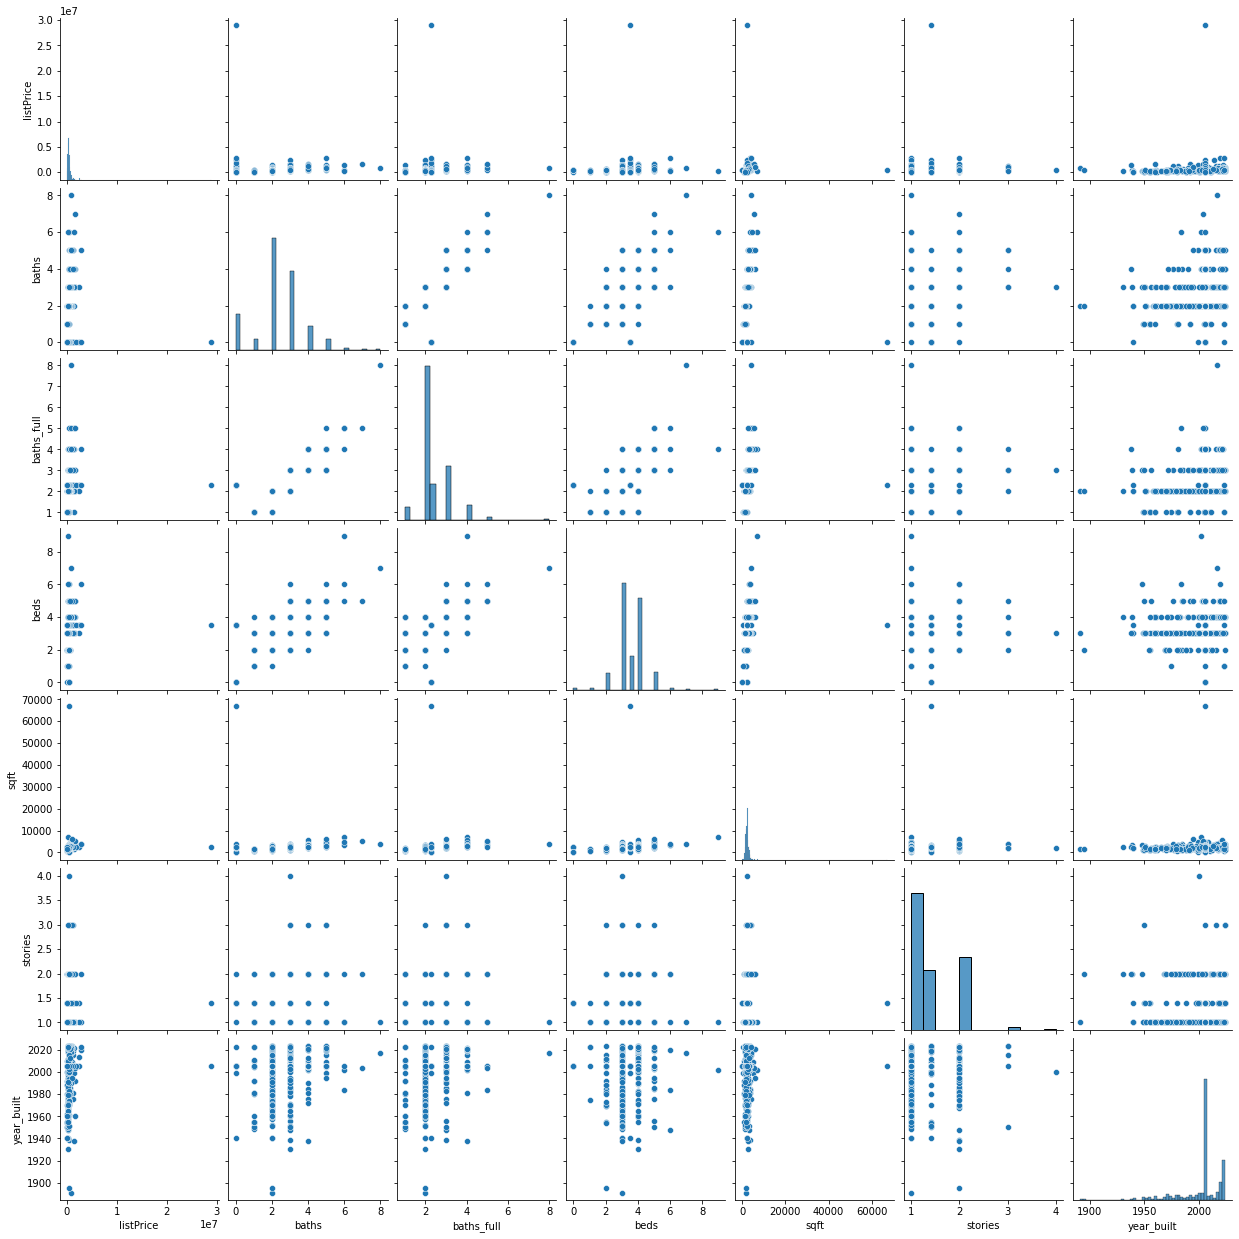

In [12]:
sns.pairplot(dataset);

In [13]:
dataset.head(1)

,status,listPrice,baths,baths_full,beds,sqft,stories,text,type,year_built
0,for_sale,240000.0,2,2.0,3.0,1190.0,1.0,Welcome home peaceful retreat nestled 2 acres ...,single_family,2018


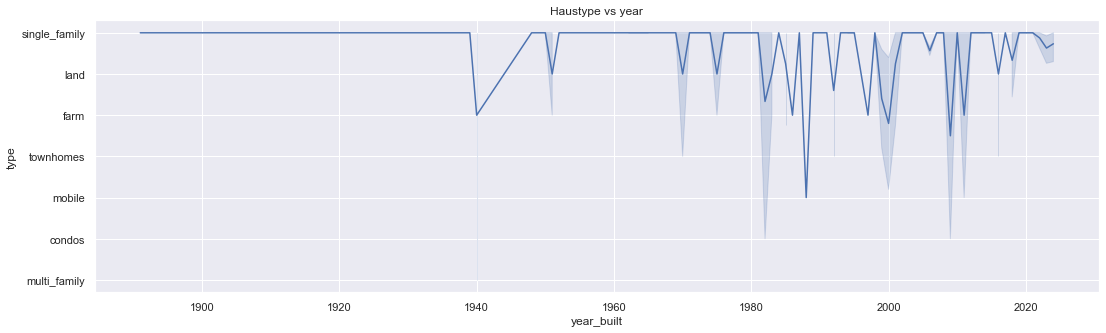

In [20]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(18,5))
sns.lineplot(x="year_built",
            y="type",
            data=dataset)
plt.title("Haustype vs year")
plt.show()

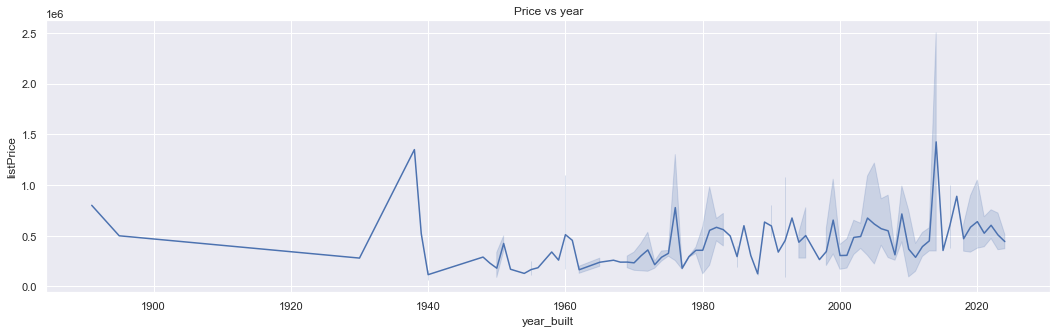

In [26]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(18,5))
sns.lineplot(x="year_built",
            y="listPrice",
            data=dataset)
plt.title("Price vs year")
plt.show()

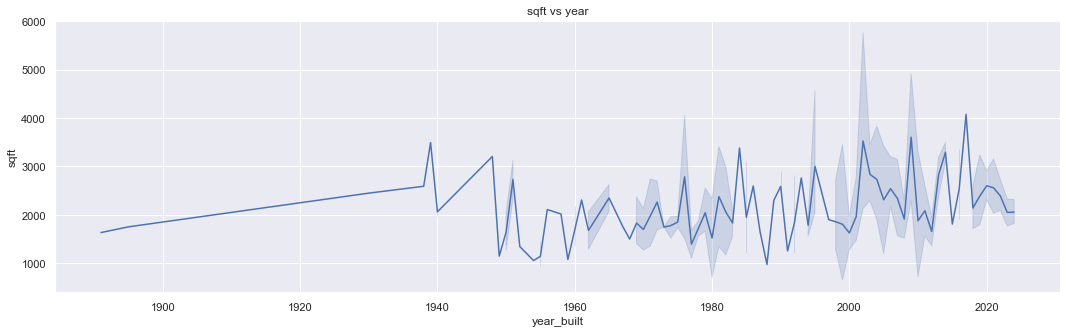

In [27]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(18,5))
sns.lineplot(x="year_built",
            y="sqft",
            data=dataset)
plt.title("sqft vs year")
plt.show()

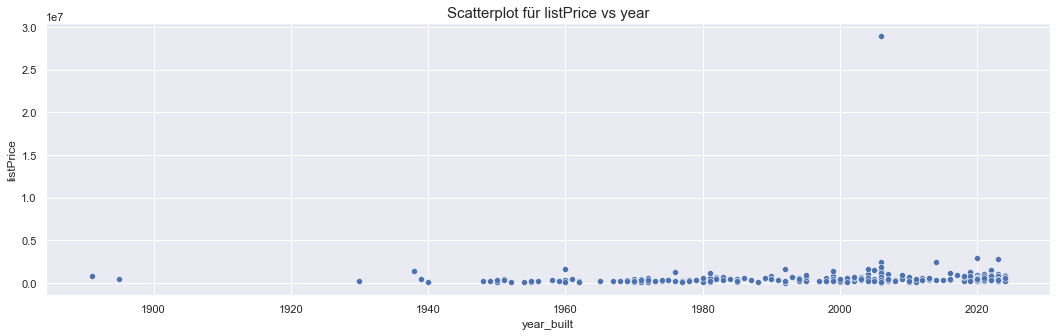

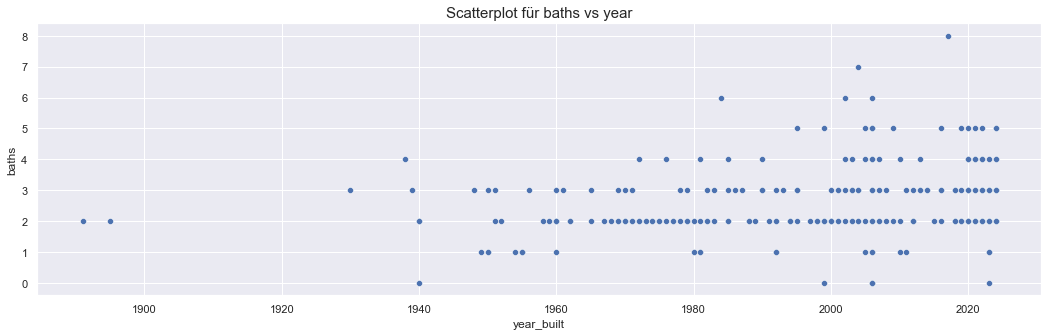

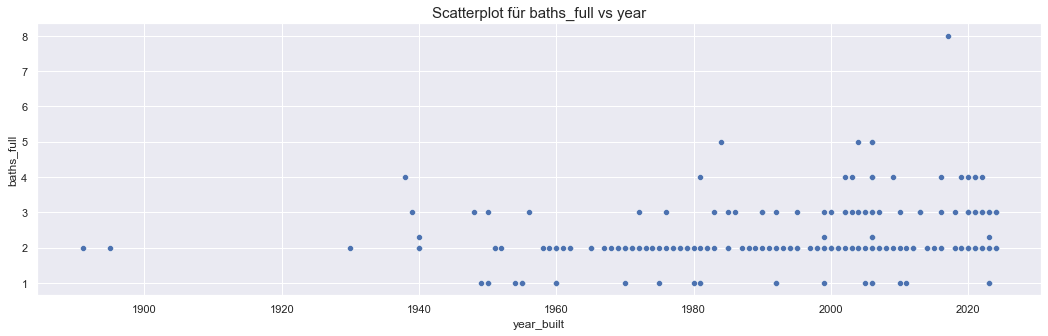

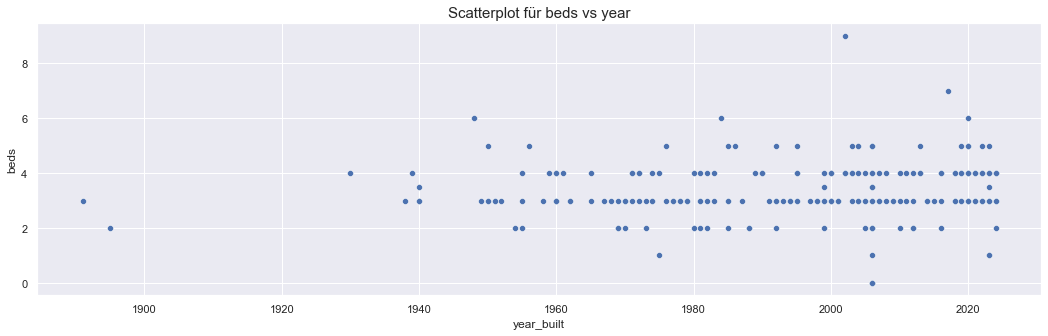

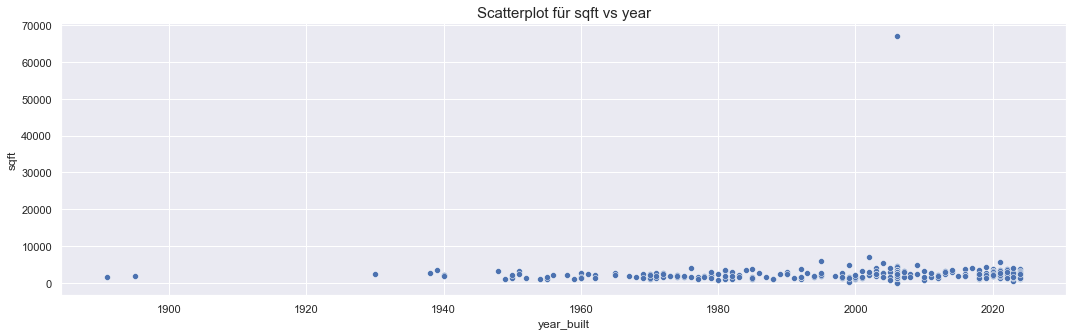

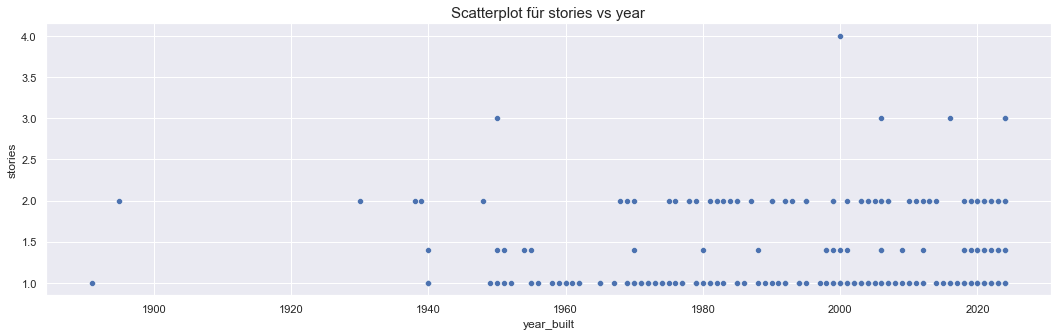

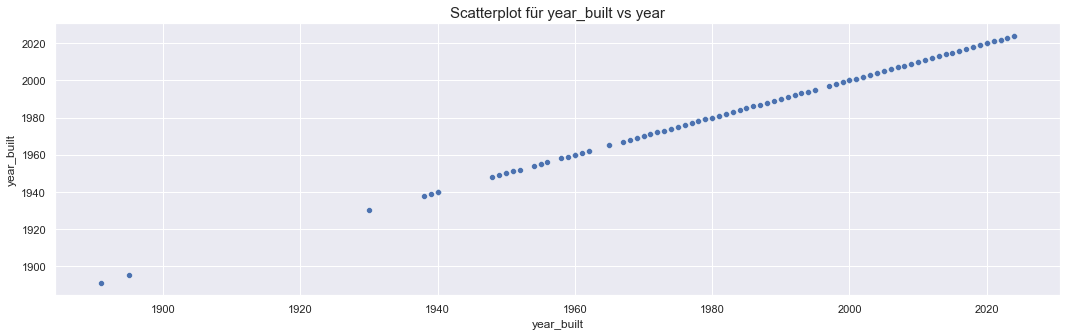

In [34]:
for col in dataset.columns:
    if dataset[col].dtype != "object":
        plt.figure(figsize=(18,5))
        sns.scatterplot(x="year_built",
                       y=col,
                       data=dataset)
        plt.title(f"Scatterplot für {col} vs year", fontsize = 15)
        plt.show()

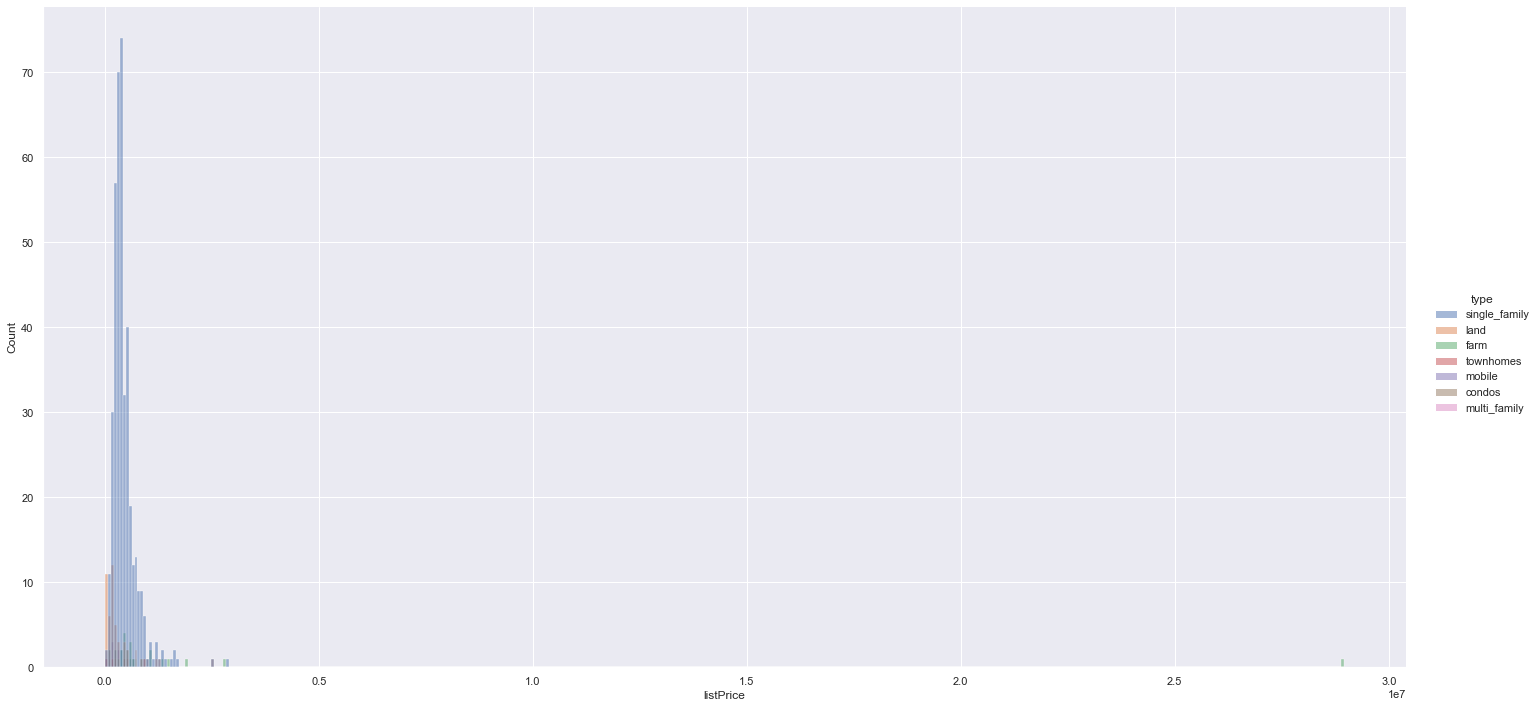

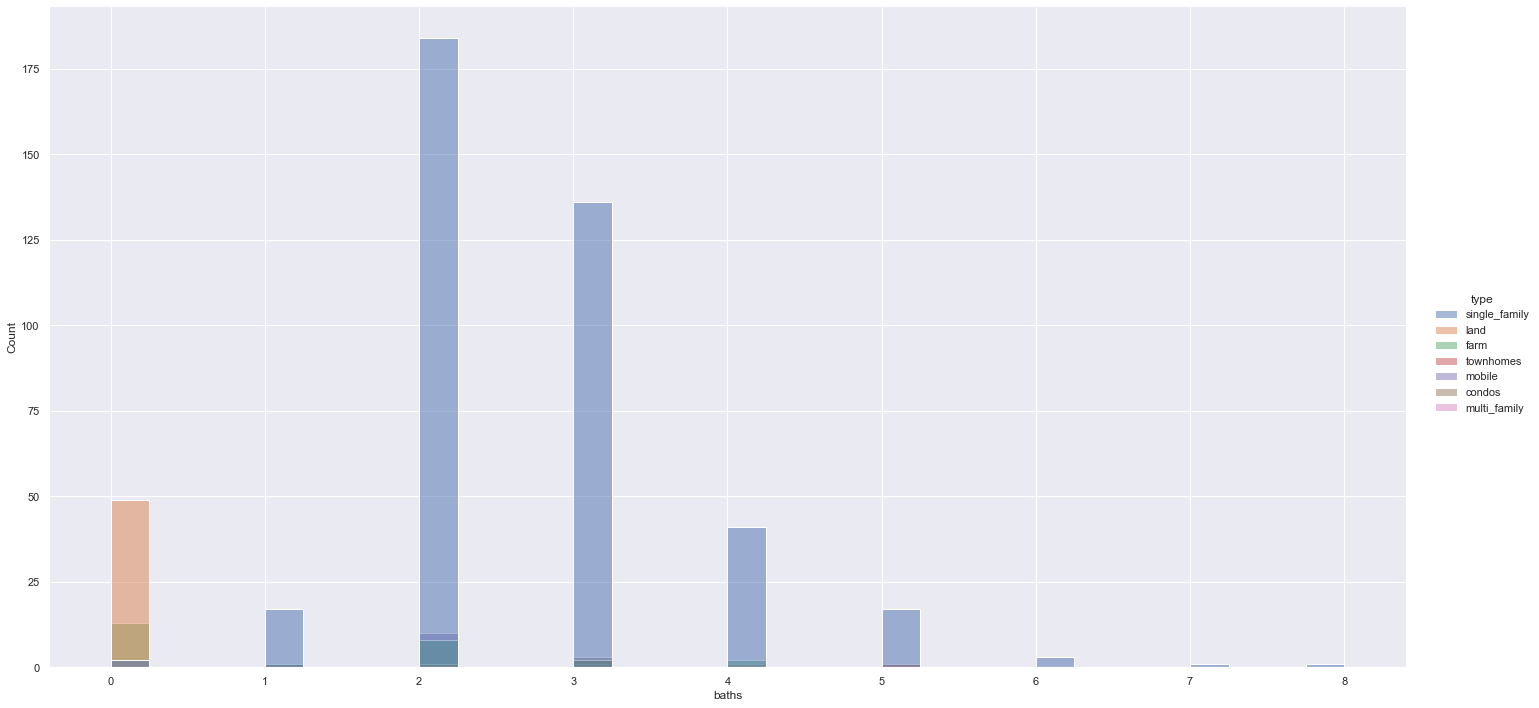

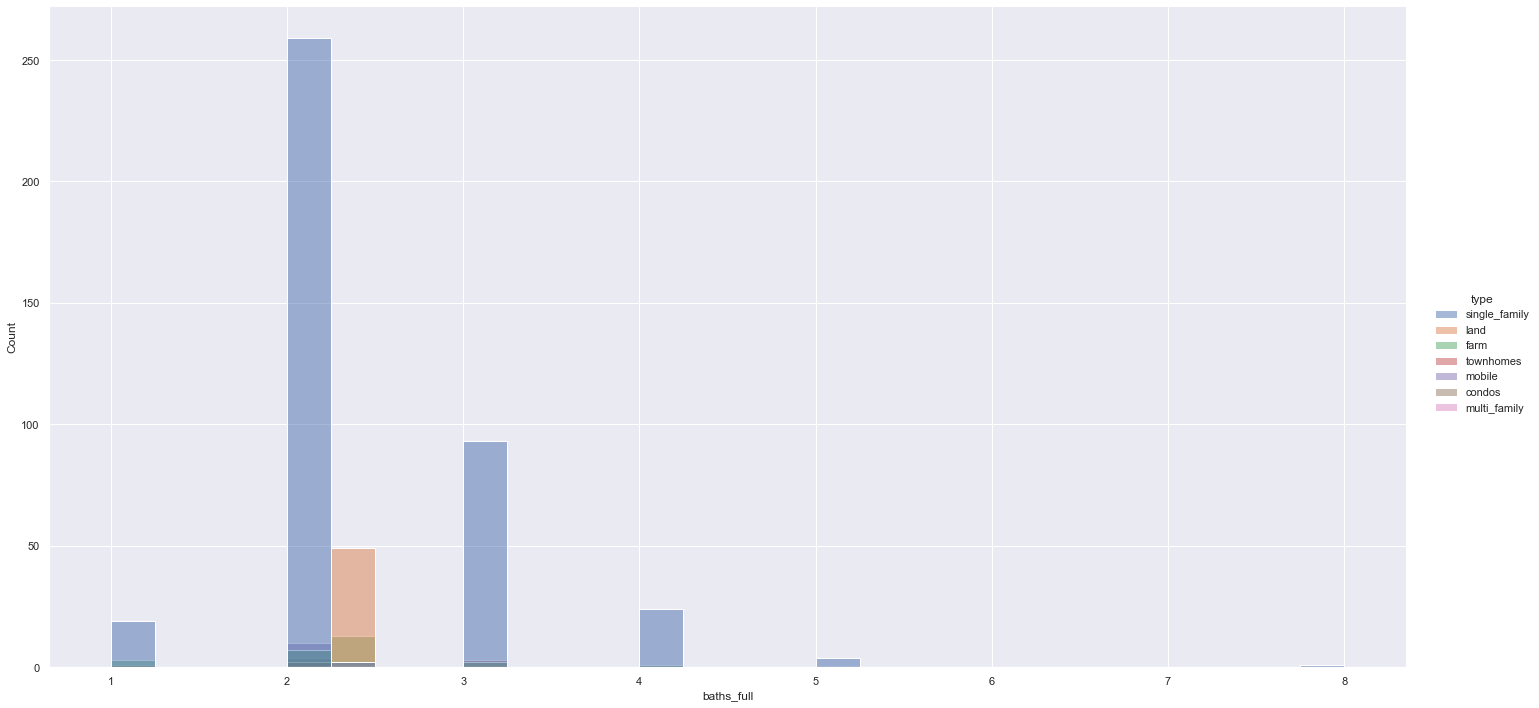

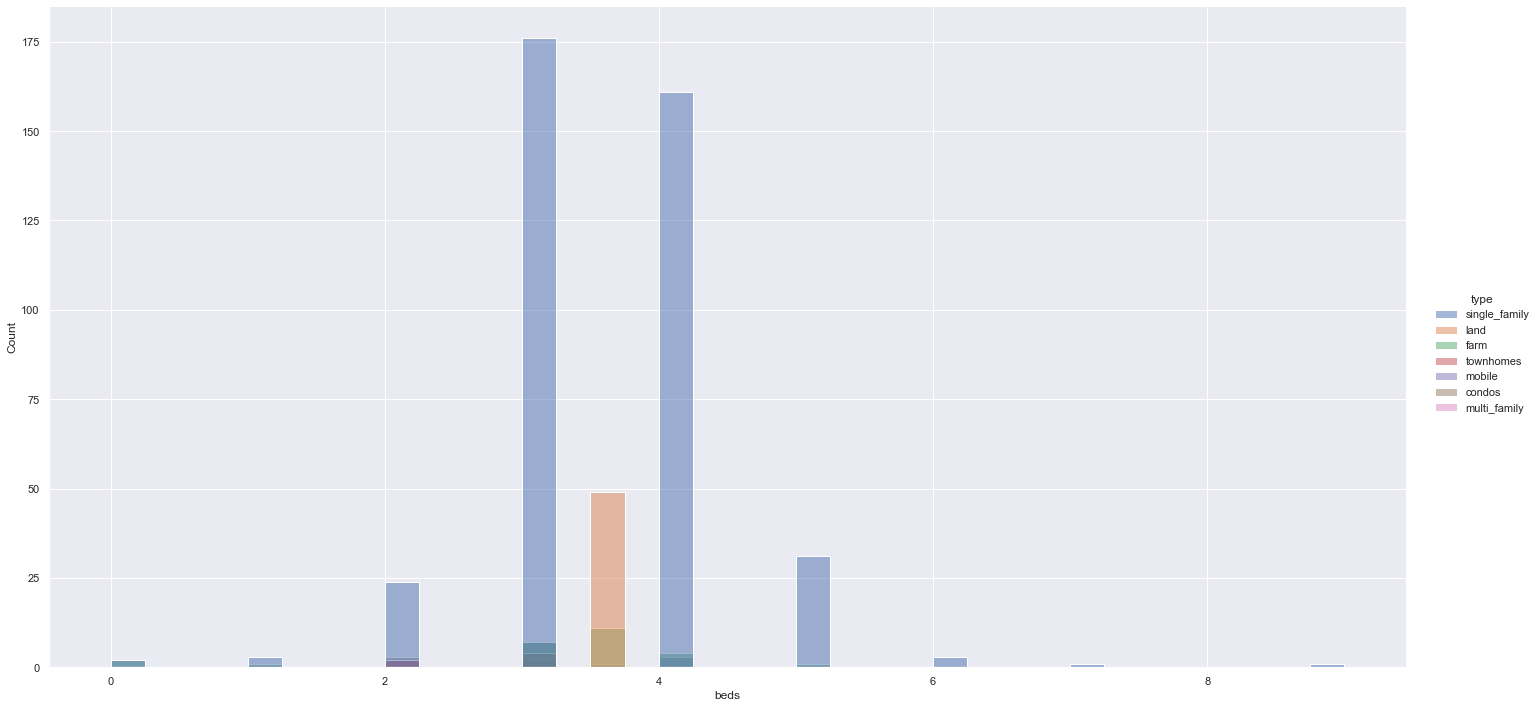

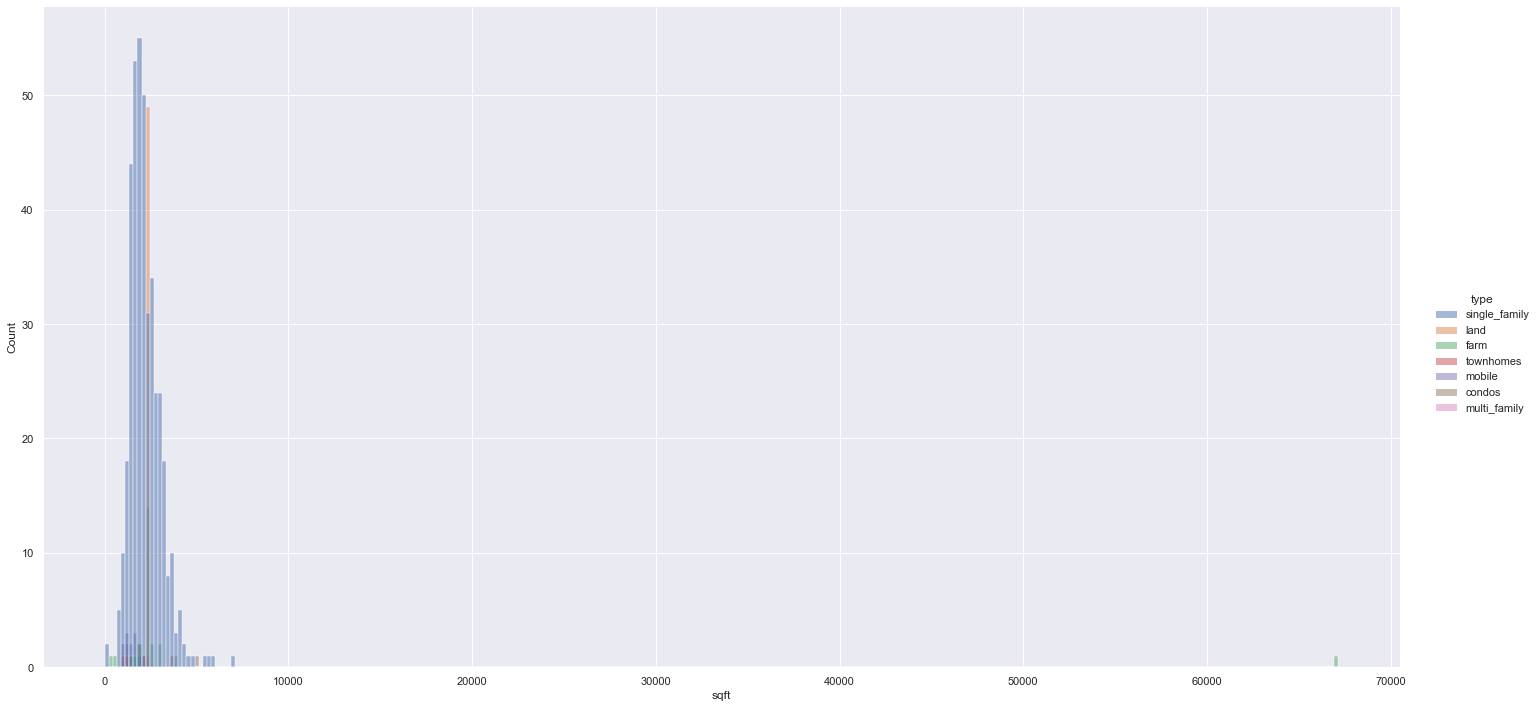

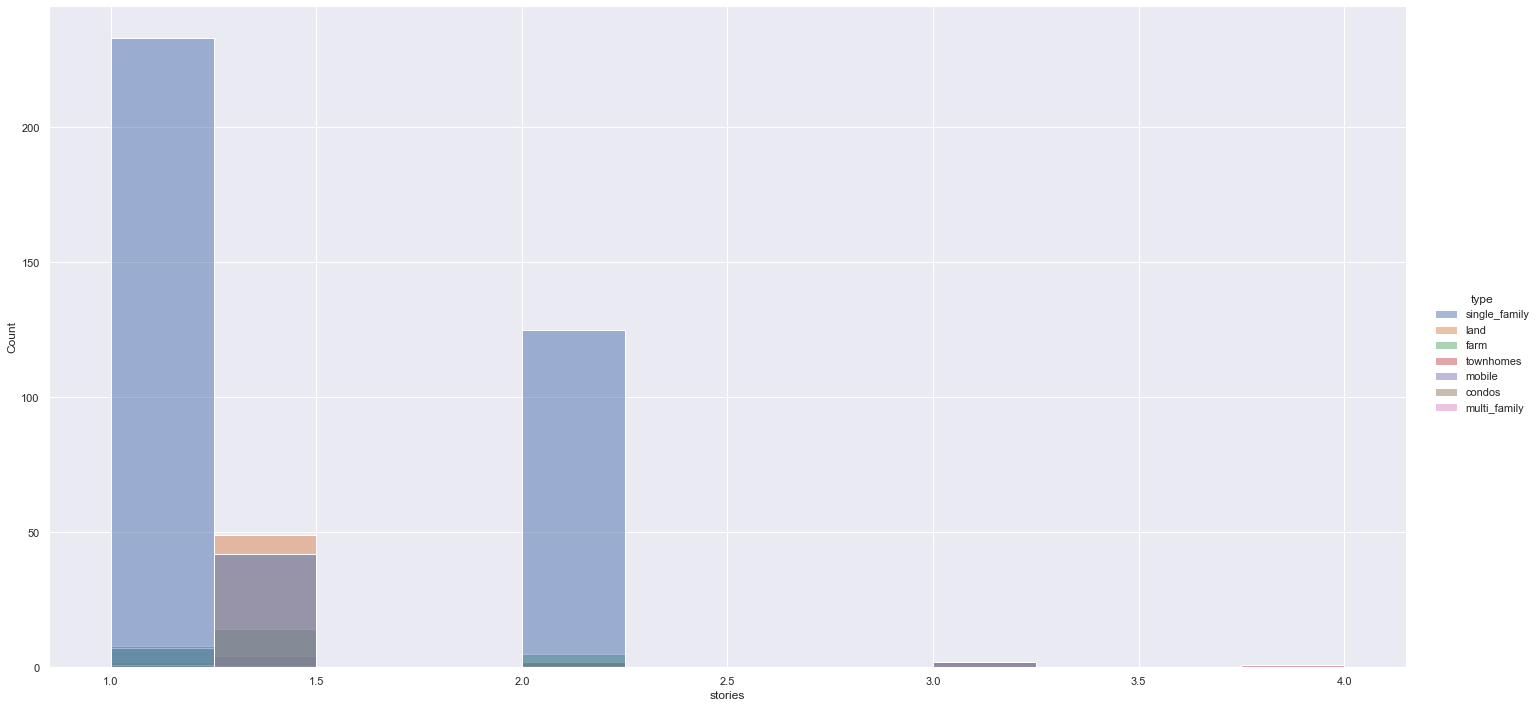

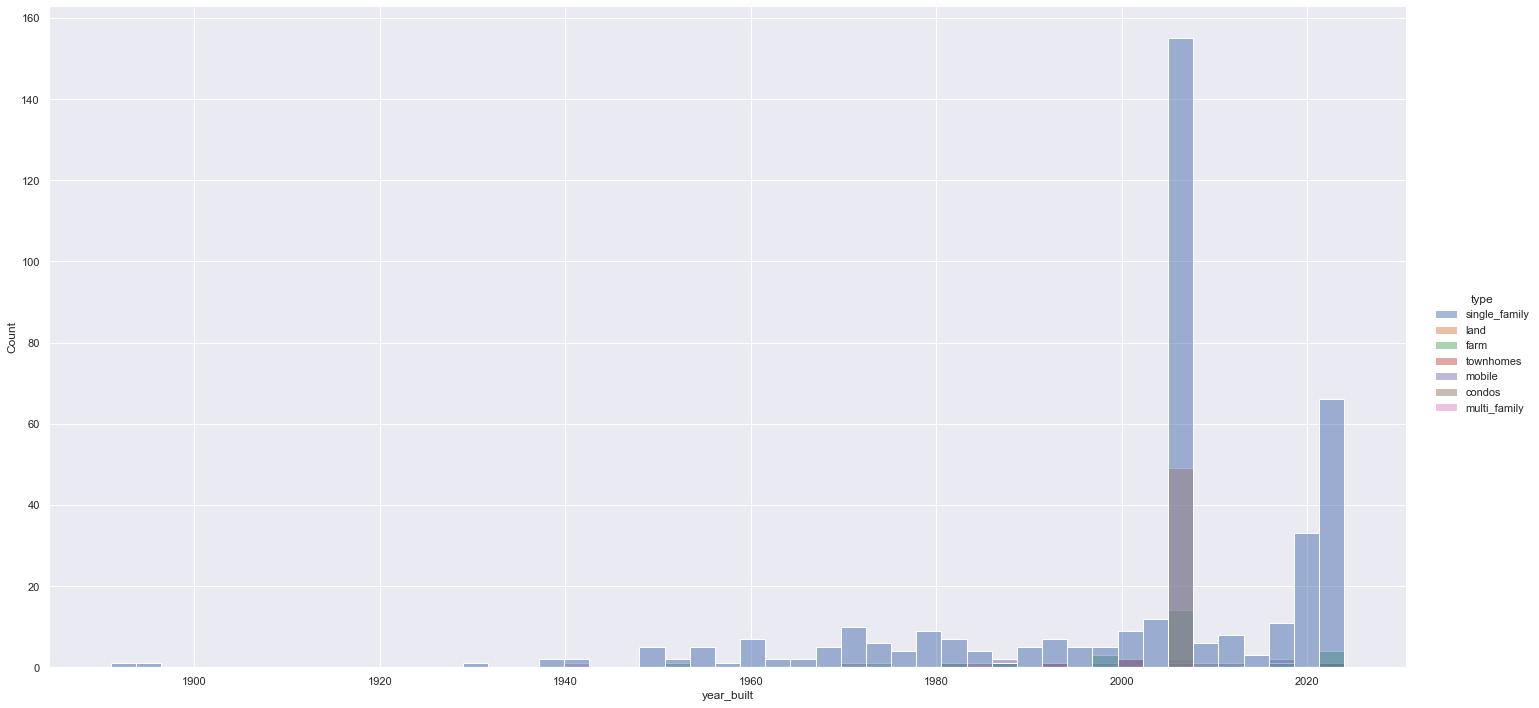

In [39]:
for col in dataset.columns:
    if dataset[col].dtype != "object":
        sns.displot(x=col,
                    data=dataset,
                    hue="type",
                    height=10,  
                    aspect=2
                   )
        plt.show()

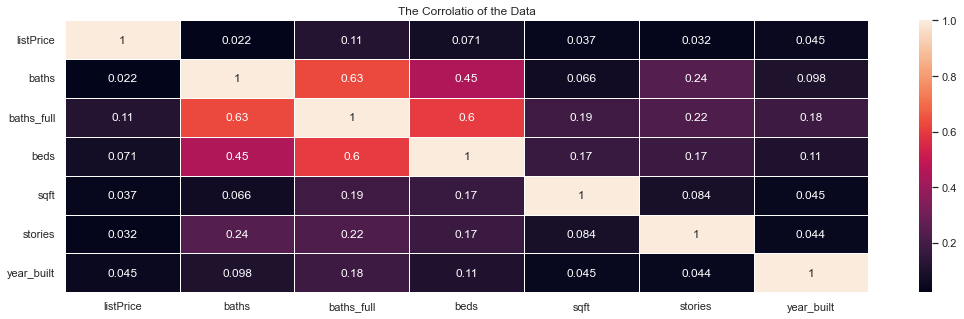

In [44]:
plt.figure(figsize=(18,5))
plt.title("The Corrolatio of the Data")
sns.heatmap(dataset.corr(), annot=True,linewidths=.5,)
plt.show()